# Classification 1

Nicholas Cunningham  
CAP 5610, Final Exam

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix

from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix


df = pd.read_csv('Exam Datasets\\classification_data.tsv',
                 header = 0, sep='\t')

X = df.iloc[:, 0:3].values
y = df.iloc[:, 3].values


## Split data into train and test set 80/20

The test set is partitioned off to determine a final performance metric for the 
best model found during training on new unseen, unlabeled data.

The remaining 80% of the data is used for training. 5-fold cross validation is 
performed on each model. The performance is measured using score on the validation set and the average performance across all 5 folds is 
calculated. Hyperparameters are tuned to improve the performance of each model.

In [20]:
# Split data into train and test set 80/20
X_Train, X_test, y_Train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [21]:
df.corr()

,Red,Green,Blue,Class
Red,1.000000,0.855250,0.496376,0.092030
Green,0.855250,1.000000,0.660098,-0.120327
Blue,0.496376,0.660098,1.000000,-0.569958
Class,0.092030,-0.120327,-0.569958,1.000000


In [22]:
df.describe()

,Red,Green,Blue,Class
count,245057.000000,245057.000000,245057.000000,245057.000000
mean,125.065446,132.507327,123.177151,1.792461
std,62.255653,59.941197,72.562165,0.405546
min,0.000000,0.000000,0.000000,1.000000
25%,68.000000,87.000000,70.000000,2.000000
50%,139.000000,153.000000,128.000000,2.000000
75%,176.000000,177.000000,164.000000,2.000000
max,255.000000,255.000000,255.000000,2.000000


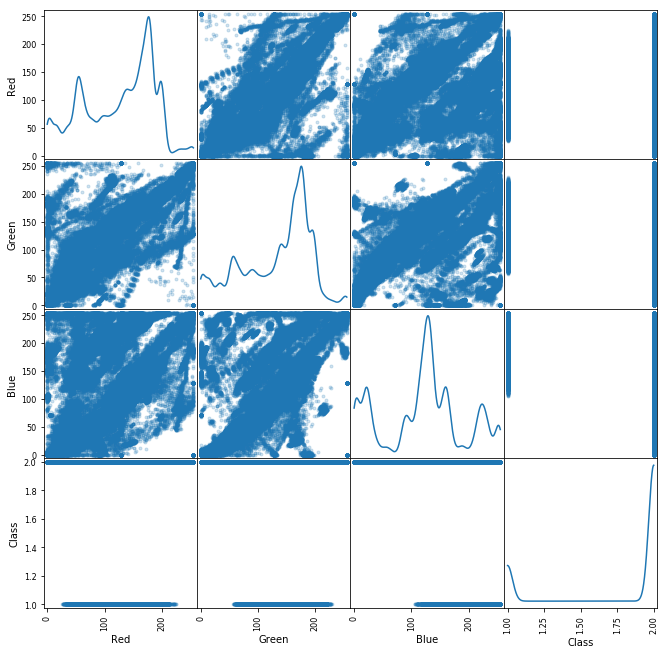

In [23]:
scatter_matrix(df, alpha=0.2, figsize=(11, 11), diagonal='kde')
plt.show()

## Analysis

KFold and GridSearchCV are used for cross validation and hyperparameter selection.

The performance metric score measures the normalized number of correctly classified data points.

The confusion matrix measures the number of correctly classified data points in each category and the number of misclassified points specifying the correct class and the predicted class. The score can be calculated by summing the diagonal elements and dividing by the total number of samples. The score works well for two class classification problems but becomes as harsh metric as the number of classes increases since the number of classes the data point can be classified as increases.

All attributes were maintained from the dataset.

### Logistic regression

In [16]:
# Logistic Regression
logistic = LogisticRegression(C=1.0, random_state=0)
scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=0)
for train_index, validation_index in kf.split(X_Train):
    X_train, X_validation = X[train_index], X[validation_index]
    y_train, y_validation = y[train_index], y[validation_index]
    
    logistic.fit(X_train, y_train)
    #logistic.fit(X_Train[:10000], y_Train[:10000])
    y_pred = logistic.predict(X_validation)
    score = logistic.score(X_validation, y_validation)
    print("Logistic Score:", score)
    print(confusion_matrix(y_validation, y_pred))
    scores.append(score)
print("\nMean accuracy:", np.mean(scores))

Logistic Score: 0.921293580555
[[ 8835  1330]
 [ 1756 27288]]
Logistic Score: 0.922951363207
[[ 8749  1314]
 [ 1707 27439]]
Logistic Score: 0.924124563238
[[ 8824  1321]
 [ 1654 27410]]
Logistic Score: 0.923027876253
[[ 8936  1311]
 [ 1707 27255]]
Logistic Score: 0.92341044148
[[ 8903  1336]
 [ 1667 27303]]

Mean accuracy: 0.922961564947


### SVM

Parameters: 'C' : [0.1,0.5,1,2,5] for soft-margin SVM.

A hard margin SVM (C=1000) was not achievable since the data is not linearly seperable in kernel space and therefore the algorithm could not converge.

A subset of 10000 data points was used for training due to time constraints.

In [4]:
# Support Vector Classifier

#parameters = [{'kernel':['linear'], 'C':[0.1,0.5,1,2,5]},
#              {'kernel':['poly'], 'degree':[2,3], 'C':[0.1,0.5,1,2,5]},
#              {'kernel':['rbf'], 'gamma':[0.1,0.5,1,2,5], 'C':[0.1,0.5,1,2,5]},
#             ]
parameters = {'kernel':['linear'], 'C':[0.1,0.5,1,2,5]}

svc = SVC()
clf = GridSearchCV(svc, parameters, cv=5, verbose=2)
clf.fit(X_Train[:10000], y_Train[:10000])
print("Best estimator:", clf.best_estimator_)
print("Best score:", clf.best_score_)
print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.1, kernel=linear ............................................
[CV] ............................. C=0.1, kernel=linear, total=  13.7s
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.7s remaining:    0.0s


[CV] ............................. C=0.1, kernel=linear, total=  12.6s
[CV] C=0.1, kernel=linear ............................................
[CV] ............................. C=0.1, kernel=linear, total=  10.2s
[CV] C=0.1, kernel=linear ............................................
[CV] ............................. C=0.1, kernel=linear, total=  11.7s
[CV] C=0.1, kernel=linear ............................................
[CV] ............................. C=0.1, kernel=linear, total=  12.4s
[CV] C=0.5, kernel=linear ............................................
[CV] ............................. C=0.5, kernel=linear, total=  47.7s
[CV] C=0.5, kernel=linear ............................................
[CV] ............................. C=0.5, kernel=linear, total=  42.5s
[CV] C=0.5, kernel=linear ............................................
[CV] ............................. C=0.5, kernel=linear, total=  41.6s
[CV] C=0.5, kernel=linear ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 56.1min finished


Best estimator: SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best score: 0.9311
Best parameters: {'C': 0.1, 'kernel': 'linear'}


### Ridge Classification

In [17]:
# Ridge Classification
parametersRidge = {}

ridge = RidgeClassifier()
clf2 = GridSearchCV(ridge, parametersRidge, cv=5, verbose=0)
clf2.fit(X_Train, y_Train)
#clf2.fit(X_Train[:10000], y_Train[:10000])
print("Best estimator:", clf2.best_estimator_)
print("Best score:", clf2.best_score_)
print("Best parameters:", clf2.best_params_)

Best estimator: RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)
Best score: 0.925302864138
Best parameters: {}


# Results of Training
Logistic  
Mean accuracy: 0.922961564947  
Mean accuracy: 0.918059629167 (with only 10000 data points)

SVM Linear  
Mean accuracy: 0.9311 (with only 10000 data points)  
Best parameters: {'C': 0.1, 'kernel': 'linear'}

Ridge  
Mean accuracy: 0.925302864138  
Mean accuracy: 0.9223 (with only 10000 data points)

The SVM Linear classifier with C=0.1 performed the best. This model was chosen to determine the final performance.

## Final performance

In [10]:
score = clf.score(X_test, y_test)

print("Mean accuracy:", score)

Mean accuracy: 0.931608585652
